## Statistical Concensus Analysis of SLAM data

In [17]:
import pandas as pd
import json as js
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

In [18]:
file_path = '/home/jayanaka-98/REPOs/slam/notebooks/Statistical Analysis/all_task_completed_B.json'
with open(file_path, 'r') as file:
    data = js.load(file)

new_dict = {}
for worker in data:
    new_dict.update(worker)

data = new_dict

In [19]:
workers = list(data.keys())
all_models= ['stablelm-zephyr_3b',
             'orca2_7b',
             'llama2_7b-chat',
             'openchat_7b-v3.5', 
             'neural-chat_7b',
             'mistral_7b-instruct',
             'gpt-4','starling-lm_7b',
             'vicuna_7b',
             'zephyr_7b-beta',
             'orca-mini_3b']

In [20]:
Play_count = {}

for worker in workers:
    Play_count[worker] = {}
    for model in all_models:
        Play_count[worker].update({model:0})

Win_count = Play_count

In [21]:
for worker in workers:
    for response in data[worker]:
        Play_count[worker][response['model1']] += 1
        Play_count[worker][response['model2']] += 1

df = (pd.DataFrame(Play_count)).T

df_sorted = df.sort_values(by=all_models)

In [22]:
for worker in workers:
    for response in data[worker]:
        if response['prefer'] == 'About the same':
            Win_count[worker][response['model1']] +=0.5
            Win_count[worker][response['model2']] +=0.5
        elif response['prefer'] == '1':
            Win_count[worker][response['model1']] +=1
        elif response['prefer'] == '2':
            Win_count[worker][response['model2']] +=1

df3 = (pd.DataFrame(Win_count)).T

In [23]:
def subsample(n,df):
    sorted = df.sort_values(by=all_models)
    memberNO = len(df)//n
    group_keys =[]
    k = []
    for i in range(len(df)):
        if i % memberNO != 0 or i==0:
            if i == 0 :
                k.append(workers[i])
            elif i % 2 == 0 :
                k.append(workers[(i)//2])
            else :
                k.append(workers[len(df)-(i+1)//2])
        else:
            group_keys.append(k)
            k = []

    return group_keys

sub_keys = subsample(4,df)

In [24]:
for worker in workers:
    for response in data[worker]:
        if response['prefer'] == 'About the same':
            Win_count[worker][response['model1']] +=0.5
            Win_count[worker][response['model2']] +=0.5
        elif response['prefer'] == '1':
            Win_count[worker][response['model1']] +=1
        elif response['prefer'] == '2':
            Win_count[worker][response['model2']] +=1

df3 = (pd.DataFrame(Win_count)).T

In [25]:
sub_data = pd.DataFrame([])

for sample in sub_keys:
    sub = df3.loc[sample]
    sub_data[sample[0]+' - '+sample[-1]] = pd.DataFrame(sub.sum(axis=0))

sub_data

,worker_1 - worker_88,worker_87 - worker_76,worker_75 - worker_63,worker_62 - worker_51
stablelm-zephyr_3b,139.0,83.0,149.0,90.0
orca2_7b,124.0,104.0,109.0,95.0
llama2_7b-chat,139.0,123.0,113.0,104.0
openchat_7b-v3.5,117.0,137.0,114.0,110.0
neural-chat_7b,125.0,102.0,111.0,127.0
mistral_7b-instruct,100.0,125.0,121.0,100.0
gpt-4,122.0,113.0,102.0,156.0
starling-lm_7b,99.0,111.0,104.0,159.0
vicuna_7b,104.0,126.0,103.0,113.0
zephyr_7b-beta,119.0,113.0,149.0,93.0


In [26]:
# i = 1
# column_names = sub_data.columns
# for sub_smpl in column_names:
#     sub_data['sub_sample_' + str(i)] = sub_data[sub_smpl].rank(ascending=False)
#     i += 1

# sub_data = sub_data.drop(column_names, axis=1)
sub_data = sub_data.sort_values(by=list(sub_data.columns))

In [27]:
sub_data

,worker_1 - worker_88,worker_87 - worker_76,worker_75 - worker_63,worker_62 - worker_51
starling-lm_7b,99.0,111.0,104.0,159.0
mistral_7b-instruct,100.0,125.0,121.0,100.0
vicuna_7b,104.0,126.0,103.0,113.0
orca-mini_3b,108.0,103.0,113.0,141.0
openchat_7b-v3.5,117.0,137.0,114.0,110.0
zephyr_7b-beta,119.0,113.0,149.0,93.0
gpt-4,122.0,113.0,102.0,156.0
orca2_7b,124.0,104.0,109.0,95.0
neural-chat_7b,125.0,102.0,111.0,127.0
stablelm-zephyr_3b,139.0,83.0,149.0,90.0


In [28]:
corr = sub_data.corr(method='kendall')

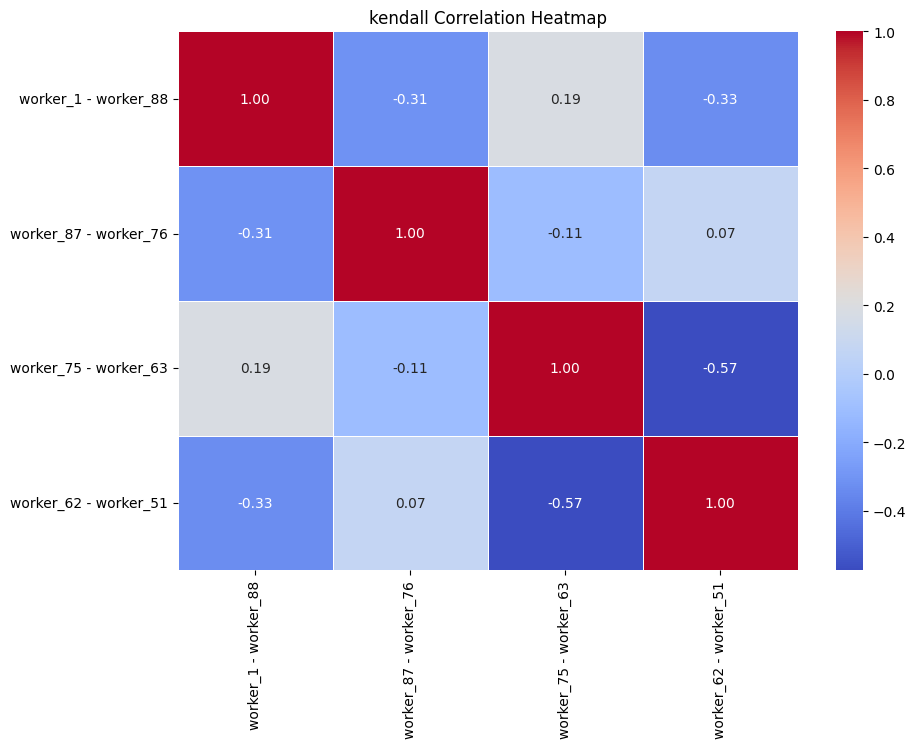

In [29]:
plt.figure(figsize=(10, 7))  # Customize figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Add titles and labels as necessary
plt.title('kendall Correlation Heatmap')
plt.show()

In [30]:
def sub_sample_optimizer(df, MaxVar):
    variance = 0
    n = 2

    for i in range(4,5):
    # while variance < MaxVar :
        sub_keys = subsample(i,df)
        sub_data = pd.DataFrame([])

        for sample in sub_keys:
            sub = df.loc[sample]
            sub_data[sample[0]+' - '+sample[-1]] = pd.DataFrame(sub.sum(axis=0))
        # n += 1
        # variance += 5
        # row_variance = m.sqrt((sub_data.var(axis=1)).var(axis=0))

        # print(row_variance)

        print(sub_data)

sub_sample_optimizer(df,1)


                     worker_1 - worker_88  worker_87 - worker_76  \
stablelm-zephyr_3b                     69                     46   
orca2_7b                               60                     58   
llama2_7b-chat                         69                     55   
openchat_7b-v3.5                       57                     66   
neural-chat_7b                         67                     52   
mistral_7b-instruct                    56                     60   
gpt-4                                  57                     58   
starling-lm_7b                         46                     56   
vicuna_7b                              52                     63   
zephyr_7b-beta                         59                     56   
orca-mini_3b                           56                     50   

                     worker_75 - worker_63  worker_62 - worker_51  
stablelm-zephyr_3b                      71                     46  
orca2_7b                                62     

In [31]:
sub1 = df.loc[sub_keys[0]]
column_sums1 = sub1.sum(axis=0)
sub2 = df.loc[sub_keys[1]]
column_sums2 = sub2.sum(axis=0)